In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture

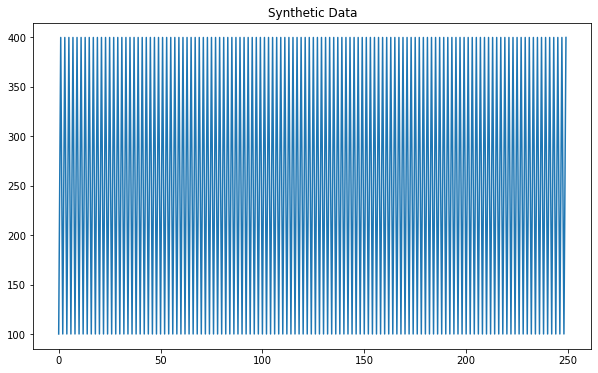

In [2]:
x = np.arange(0, 250)
y = np.empty([250], dtype = int)
for i in range (0, 250):
    
sd = y
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title("Synthetic Data")
plt.show()

In [3]:
seasonal_data = pd.DataFrame(zip(x,y),columns=['Time','Value'])
seasonal_data

,Time,Value
0,0,100
1,1,400
2,2,100
3,3,400
4,4,100
...,...,...
245,245,400
246,246,100
247,247,400
248,248,100


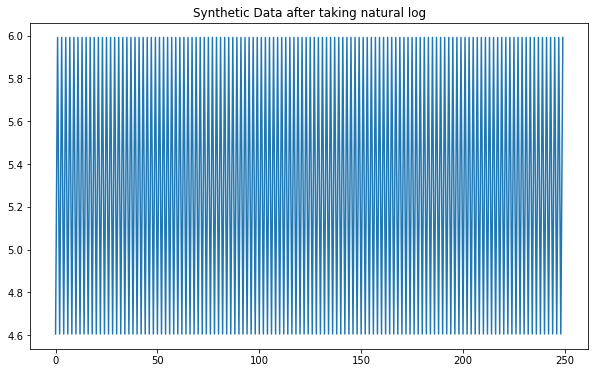

In [4]:
log_data = np.log(seasonal_data['Value'])
plt.figure(figsize=(10,6))
plt.plot(seasonal_data['Time'], log_data)
plt.title("Synthetic Data after taking natural log")
plt.show()

In [5]:
nlog_data = pd.DataFrame(zip(seasonal_data['Time'], log_data),columns=['Time','Log Value'])
nlog_data

,Time,Log Value
0,0,4.605170
1,1,5.991465
2,2,4.605170
3,3,5.991465
4,4,4.605170
...,...,...
245,245,5.991465
246,246,4.605170
247,247,5.991465
248,248,4.605170


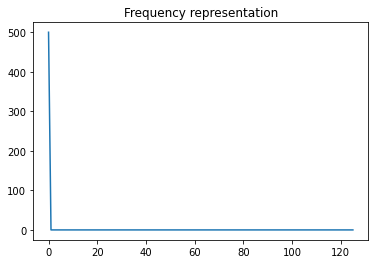

In [6]:
N = 250
sr = 1
y = np.array(seasonal_data['Value'])
f = fftpack.fftfreq(len(y))
yf = fftpack.fft(y)

T = 1.0 / N
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Frequency representation")
plt.show()

In [7]:
freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
freq_ampli

,Freq,Ampli
0,0.000,5.000000e+02
1,0.004,0.000000e+00
2,0.008,5.378755e-15
3,0.012,3.586819e-15
4,0.016,0.000000e+00
...,...,...
120,0.480,0.000000e+00
121,0.484,0.000000e+00
122,0.488,2.155787e-15
123,0.492,3.229717e-15


In [8]:
freq_ampli = freq_ampli.iloc[1:,:]

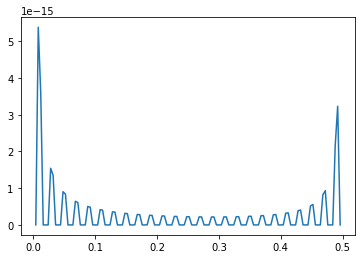

In [9]:
plt.plot(freq_ampli.Freq,freq_ampli.Ampli)

In [10]:
freq_ampli

,Freq,Ampli
1,0.004,0.000000e+00
2,0.008,5.378755e-15
3,0.012,3.586819e-15
4,0.016,0.000000e+00
5,0.020,0.000000e+00
...,...,...
120,0.480,0.000000e+00
121,0.484,0.000000e+00
122,0.488,2.155787e-15
123,0.492,3.229717e-15


In [11]:
freq_ampli.Ampli.value_counts()

0.000000e+00    74
2.183628e-16     1
3.563965e-16     1
2.176285e-16     1
4.816777e-16     1
2.330054e-16     1
2.577989e-16     1
2.162661e-16     1
4.150911e-16     1
2.539716e-16     1
2.616003e-16     1
2.826797e-16     1
8.350651e-16     1
2.792204e-16     1
5.568424e-16     1
2.155787e-15     1
3.586819e-15     1
2.302137e-16     1
4.015562e-16     1
9.034000e-16     1
5.170795e-16     1
6.428717e-16     1
2.758463e-16     1
2.418375e-16     1
2.222580e-16     1
6.083521e-16     1
2.176432e-16     1
2.235762e-16     1
3.469498e-16     1
2.182953e-16     1
1.349126e-15     1
5.022776e-16     1
2.446545e-16     1
3.175369e-16     1
2.162589e-16     1
2.496295e-16     1
2.322288e-16     1
1.540586e-15     1
9.329785e-16     1
2.843039e-16     1
2.229083e-16     1
3.079282e-16     1
8.193359e-16     1
4.067303e-16     1
3.286347e-16     1
3.229717e-15     1
2.357354e-16     1
2.245003e-16     1
3.872652e-16     1
5.378755e-15     1
3.147806e-16     1
Name: Ampli, dtype: int64

In [12]:
frame_size = 50
Fs = 1
dt = 1/Fs
freq_vector = np.fft.rfftfreq(frame_size, d=dt)

In [13]:
yf1 = yf[yf != 0]
yf1

array([ 6.25000000e+04-0.00000000e+00j,  2.14182271e-13-6.37316993e-13j,
       -1.32105846e-13-4.28448243e-13j,  6.58986846e-14-1.80947040e-13j,
       -4.56440695e-14-1.62346258e-13j,  4.12601241e-14-1.05117348e-13j,
       -2.57615778e-14-1.01154241e-13j,  3.11712440e-14-7.40669677e-14j,
       -1.69790043e-14-7.41242588e-14j,  2.57157517e-14-5.72766887e-14j,
       -1.20613470e-14-5.89892660e-14j,  2.23241292e-14-4.68383482e-14j,
       -8.94283034e-15-4.93914585e-14j,  2.00341908e-14-3.97906423e-14j,
       -6.81105920e-15-4.28305416e-14j,  1.84053264e-14-3.47775133e-14j,
       -5.28271848e-15-3.81267925e-14j,  1.72083896e-14-3.10937205e-14j,
       -4.15447354e-15-3.46544116e-14j,  1.63136596e-14-2.83400247e-14j,
       -3.30969619e-15-3.20544543e-14j,  1.56436149e-14-2.62778392e-14j,
       -2.67817201e-15-3.01108227e-14j,  1.51508018e-14-2.47611166e-14j,
       -2.21690450e-15-2.86911873e-14j,  1.48067527e-14-2.37022422e-14j,
       -1.90042808e-15-2.77171730e-14j,  1.45963719

In [14]:
quefrency = np.fft.rfftfreq(np.log(yf1).size,freq_vector[1] - freq_vector[0])
cepstrum = np.fft.rfft(np.log(np.abs(yf1)))

In [15]:
quefrency

array([ 0.        ,  0.49019608,  0.98039216,  1.47058824,  1.96078431,
        2.45098039,  2.94117647,  3.43137255,  3.92156863,  4.41176471,
        4.90196078,  5.39215686,  5.88235294,  6.37254902,  6.8627451 ,
        7.35294118,  7.84313725,  8.33333333,  8.82352941,  9.31372549,
        9.80392157, 10.29411765, 10.78431373, 11.2745098 , 11.76470588,
       12.25490196, 12.74509804, 13.23529412, 13.7254902 , 14.21568627,
       14.70588235, 15.19607843, 15.68627451, 16.17647059, 16.66666667,
       17.15686275, 17.64705882, 18.1372549 , 18.62745098, 19.11764706,
       19.60784314, 20.09803922, 20.58823529, 21.07843137, 21.56862745,
       22.05882353, 22.54901961, 23.03921569, 23.52941176, 24.01960784,
       24.50980392, 25.        ])

In [16]:
cepstrum

array([-3.03586262e+03+0.00000000e+00j,  1.28840864e+01-1.12965193e-14j,
        1.28468590e+02+5.77315973e-15j,  2.02914474e-01-3.35842465e-14j,
        1.02922272e+02-3.77475828e-15j, -1.77169752e-02-1.94289029e-14j,
        9.35127811e+01-2.65343303e-14j, -1.31030090e-02-1.77635684e-14j,
        8.85806253e+01-2.29816166e-14j, -7.87728890e-03-2.23964706e-14j,
        8.55004783e+01-6.74844732e-15j, -5.16780813e-03-2.29095911e-14j,
        8.33741712e+01-2.99731041e-14j, -3.64806666e-03+1.18475022e-14j,
        8.18123571e+01+9.65666141e-15j, -2.72011569e-03-9.83258637e-15j,
        8.06186645e+01+1.96722241e-14j, -2.12029183e-03+2.48689958e-14j,
        7.96832284e+01+1.09847289e-14j, -1.71969561e-03-6.72396190e-15j,
        7.89397986e+01+1.92600906e-14j, -1.44991848e-03+3.18776260e-15j,
        7.83461211e+01+2.14302220e-14j, -1.27285198e-03+6.28927447e-15j,
        7.78740791e+01+3.46560450e-15j, -1.16722679e-03-1.11832181e-14j,
        7.75043709e+01-1.23535101e-14j, -1.12234143

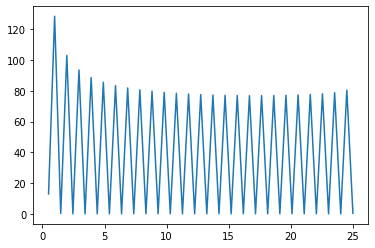

In [17]:
cep = pd.DataFrame(zip(quefrency,cepstrum.real),columns=['Quefrency','Cepstrum'])
cep = cep.iloc[1:,:]
plt.plot(cep.Quefrency,cep.Cepstrum)

In [18]:
dfx = np.array(seasonal_data['Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm0 = gmm

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site

In [19]:
dfx = np.array(nlog_data['Log Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm1 = gmm

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site

In [20]:
dfx = freq_ampli
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm2 = gmm

In [21]:
dfx = cep
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm3 = gmm

In [22]:
best_gmm0

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

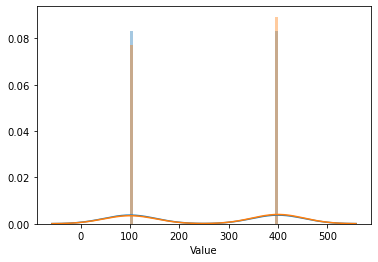

In [23]:
sns.distplot(seasonal_data['Value'],bins=50)
z,_ = best_gmm0.sample(250)
sns.distplot(z,bins=50)

In [24]:
print(best_gmm0.score(np.array(seasonal_data['Value']).reshape(-1,1)))
print(best_gmm0.score(z))

5.29566956521752
4.803132195443163


In [25]:
best_gmm2

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [26]:
best_gmm2.weights_

array([1.])

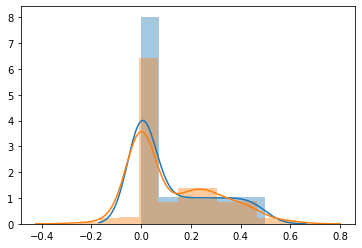

In [27]:
freq1 = freq_ampli
y,_ = best_gmm2.sample(120)
sns.distplot(freq1)
sns.distplot(y)

In [28]:
print(best_gmm2.score(freq1))
print(best_gmm2.score(y))

6.513543408396835
5.861075594006413


In [29]:
freq1.describe()

,Freq,Ampli
count,124.000000,1.240000e+02
mean,0.250000,2.692255e-16
std,0.143759,6.965340e-16
min,0.004000,0.000000e+00
25%,0.127000,0.000000e+00
50%,0.250000,0.000000e+00
75%,0.373000,2.587493e-16
max,0.496000,5.378755e-15


In [30]:
best_gmm2.means_

array([[2.50000000e-01, 2.69225515e-16]])

In [31]:
best_gmm3

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

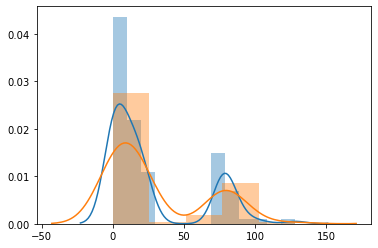

In [32]:
cep1 = cep
a,_ = best_gmm3.sample(52)
sns.distplot(cep1)
sns.distplot(a)

In [33]:
print(best_gmm3.score(cep1))
print(best_gmm3.score(a))

-3.5590472814766136
-3.7805824795020673


In [34]:
best_gmm1

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

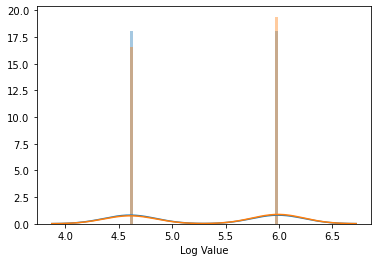

In [35]:
sns.distplot(nlog_data['Log Value'],bins=50)
z2,_ = best_gmm1.sample(250)
sns.distplot(z2,bins=50)

In [36]:
print(best_gmm1.score(np.array(nlog_data['Log Value']).reshape(-1,1)))
print(best_gmm1.score(z2))

5.295669519742787
4.894875510216398
